# Assignment 1 - LinearRegression
---

This exercise uses medical insurance data from the Machine Learning with R book by Brett Lantz.

You will start by loading the dataset and preparing the data for model training, and you will then build, train and test a MLR model. 

## Q1 Imports + Data Loading

### 1.1 Import numpy and pandas

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1.2 Load the dataset into a pandas df

In [35]:
# Load data
df = pd.read_csv("../Data/insurance.csv")

## Q2. Basic EDA

Explore the data set and answer the following questions:

1. How many columns are there? 7 total
2. How many columns are in numerical format? 4
3. How many columns are categorical? 3
4. Are there missing values? No

In [36]:
# Basic EDA

In [37]:
# 1. How many columns are there?

print(f"Number of columns is : {len(df.columns)}\n")

# Iterate through the columns of the DataFrame and print each column's index and name

for i, col in enumerate(df.columns):
    print(f"Column N° {i+1} is : {col}")

Number of columns is : 7

Column N° 1 is : age
Column N° 2 is : sex
Column N° 3 is : bmi
Column N° 4 is : children
Column N° 5 is : smoker
Column N° 6 is : region
Column N° 7 is : charges


In [38]:
# 2. How many columns are in numerical format?

# Select columns in the DataFrame that have a numerical data type

numerical_columns = df.select_dtypes(include=["number"]).columns

print(f"Number of numerical columns is : {len(numerical_columns)}\n")

# Iterate through the numerical columns and print each column's index and name

for i, col in enumerate(numerical_columns):
    print(f"Column N° {i+1} is : {col}")

Number of numerical columns is : 4

Column N° 1 is : age
Column N° 2 is : bmi
Column N° 3 is : children
Column N° 4 is : charges


In [39]:
# 3. How many columns are categorical? 

# Select columns in the DataFrame that have an object data type

categorical_columns = df.select_dtypes(include=["object"]).columns

print(f"Number of categorical columns is : {len(categorical_columns)}\n")

# Iterate through the categorical columns and print each column's index and name

for i, col in enumerate(categorical_columns):
    print(f"Column N° {i+1} is : {col}")

Number of categorical columns is : 3

Column N° 1 is : sex
Column N° 2 is : smoker
Column N° 3 is : region


In [40]:
# 4. Are there missing values? 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

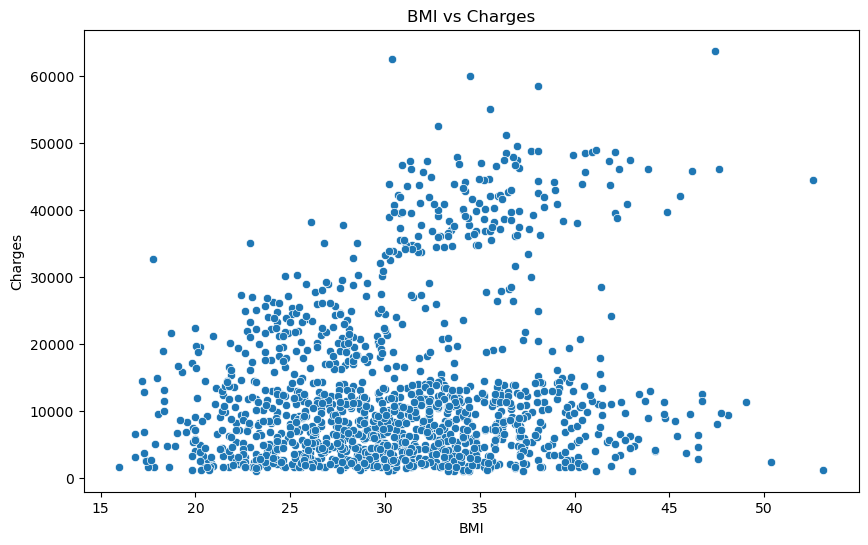

In [41]:
# Data Visualization

# scatter plot between BMI and Charges

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges')
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

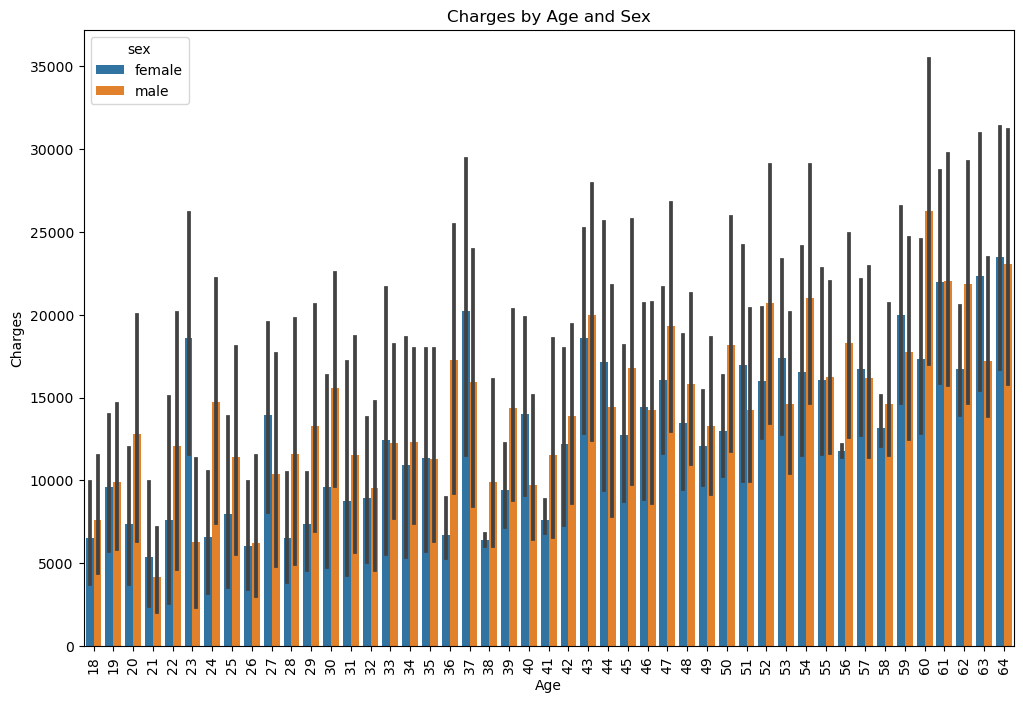

In [42]:
# Bar plot with 'age' on the x-axis, 'charges' on the y-axis, and bars separated by 'sex'

plt.figure(figsize=(12, 8))
sns.barplot(data=df, x="age", y="charges", hue="sex", dodge=True)
plt.xticks(rotation=90)
plt.title('Charges by Age and Sex')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

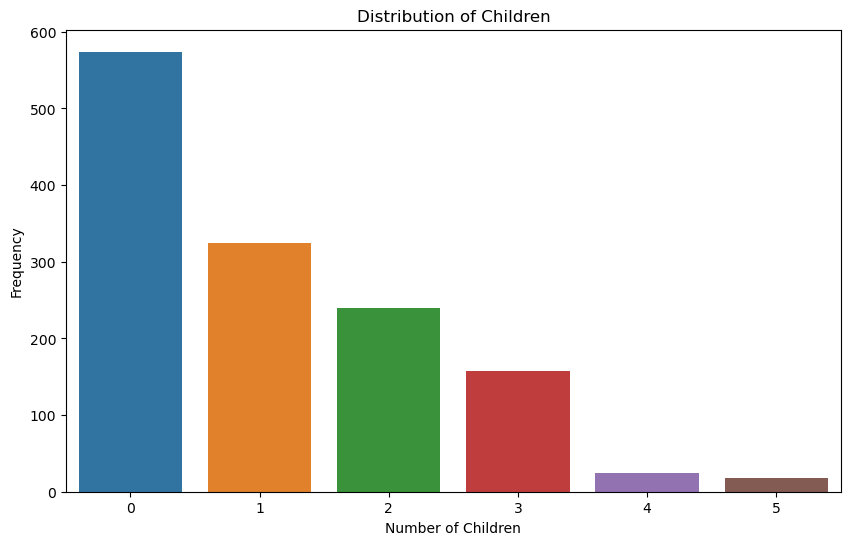

In [43]:
# Count plot of Children

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="children")
plt.title('Distribution of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

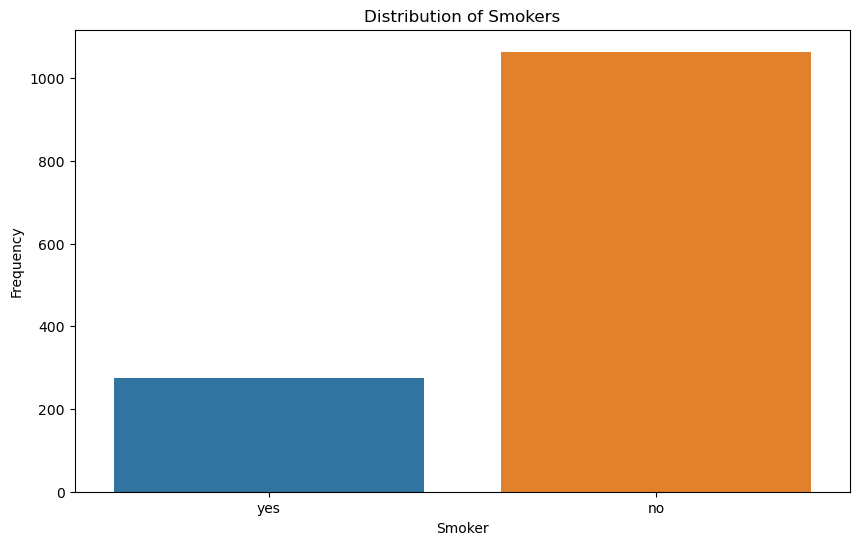

In [44]:
# Count plot of smokers

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="smoker")
plt.title('Distribution of Smokers')
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.show()

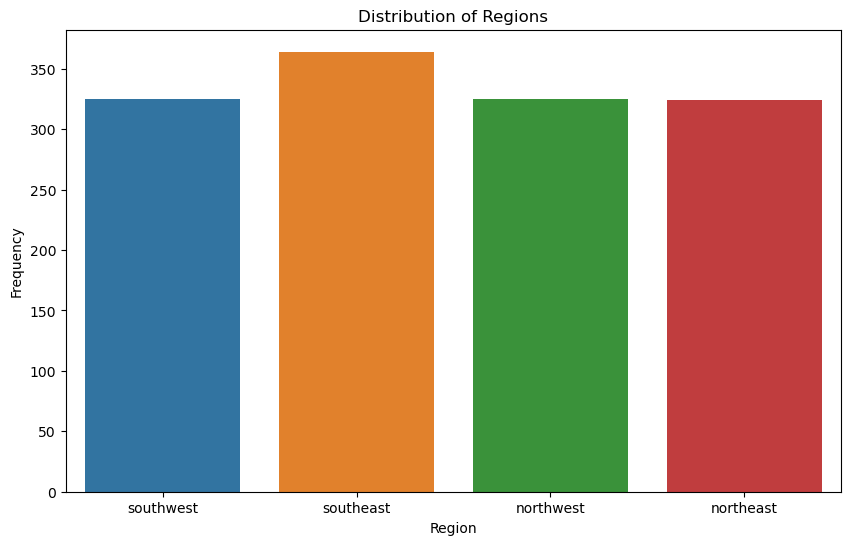

In [45]:
# Count plot of regions

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="region")
plt.title('Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()

## Q3. Encode Categorical Columns

Transform all the categorical columns into numerical format. You can choose the appropriate scikit-learn encoder.

In [46]:
# Answer here

# Import the OneHotEncoder from sklearn for encoding categorical variables

from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder

encoder = OneHotEncoder(drop="first", sparse=False)

# Fit the encoder on the specified categorical columns and transform them into a one-hot encoded format

encoder_col = encoder.fit_transform(df[['sex', 'smoker', 'region']])

# Create a new DataFrame

new_df = pd.DataFrame(encoder_col, columns=encoder.get_feature_names_out(['sex', 'smoker', 'region']))

# Display the resulting one-hot encoded DataFrame

new_df

C:\Users\info\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
1333,1.0,0.0,1.0,0.0,0.0
1334,0.0,0.0,0.0,0.0,0.0
1335,0.0,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,0.0,1.0


In [47]:
# Concatenate the original DataFrame 'df' with  'new_df'

df = pd.concat([df, new_df], axis=1)

# Display the updated DataFrame

df

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1.0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0.0,0.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0.0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0.0,0.0,0.0,0.0,1.0


In [48]:
# Drop the original categorical columns ('sex', 'smoker', 'region') from the DataFrame as they have been replaced by one-hot encoded columns

df = df.drop(columns=["sex", "smoker", "region"], axis=1)

# Display the updated DataFrame

df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,0.0,0.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,0.0,0.0,0.0,0.0,1.0


## Q4. Correlation

Which 3 columns have the highest correlation with the charges column?

In [49]:
# Answer here

# Calculate the correlation of all features with the 'charges'

charges_corr = df.corr()["charges"].drop("charges")

# Select the top 3 features with the highest absolute correlation with 'charges'

top3_charges_corr = charges_corr.abs().nlargest(3)

In [50]:
print(f"Top 3 columns have the highest correlation with the charges column are:")
for i in (top3_charges_corr.index):
    print(i,end='  , ')
    
print("\n")

for j,i in enumerate(top3_charges_corr.index):
    print(f"The Correlation Coefficient between 'charges' and '{i}' is : {top3_charges_corr[j]}")

Top 3 columns have the highest correlation with the charges column are:
smoker_yes  , age  , bmi  , 

The Correlation Coefficient between 'charges' and 'smoker_yes' is : 0.7872514304984766
The Correlation Coefficient between 'charges' and 'age' is : 0.299008193330648
The Correlation Coefficient between 'charges' and 'bmi' is : 0.19834096883362912


## Q5. Prepare Data

Separate the independent features X from the target variable y.

In [51]:
# Answer here
X = df.drop(columns='charges')
y = df["charges"]

## Q6. Train/Test Split

Split the dataset into training/testing data. You can use 90% of the data for training purposes.

In [52]:
# Answer here

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=1)

## Q7. Scale Data

Scale your data. Use the appropriate `scikit-learn` scaler. Remember the rules about data leakage. 

In [53]:
# Answer here
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler

scaler = StandardScaler()

# Fit-transform training data

X_train = scaler.fit_transform(X_train)

# Transform only on test data

X_test = scaler.transform(X_test)

## Q8. Train Model

Create and train a `LinearRegression` model.

In [54]:
# Answer here
# Import the LinearRegression class from scikit-learn to create a linear regression model

from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model

lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

LinearRegression()

In [55]:
# Use the trained linear regression model to make predictions on the test set (X_test)

y_pred = lr.predict(X_test)

## Q9. Evaluate Model

### 9.1 Obtain the MAE, MSE, RMSE and R2 scores

In [56]:
# Answer here
# Import the necessary metrics from scikit-learn to evaluate the model's performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the Mean Absolute Error (MAE)

MAE = mean_absolute_error(y_pred, y_test)

# Calculate the Mean Squared Error (MSE)

MSE = mean_squared_error(y_pred, y_test)

# Calculate the Root Mean Squared Error (RMSE)

RMSE = np.sqrt(MSE)

# Calculate the R² score
R2_score = r2_score(y_pred, y_test)

In [57]:
print(f"The Mean Absolute Error : {MAE}")
print(f"The Mean Squared Error : {MSE}")
print(f"The Root Mean Squared Error : {RMSE}")
print(f"The R² score : {R2_score}")

The Mean Absolute Error : 4376.263163471116
The Mean Squared Error : 43104275.104990706
The Root Mean Squared Error : 6565.384612114564
The R² score : 0.609856064343317


### 9.2 Explain the R2 Score and what it indicates.

Insert a markdown cell under this cell to answer Q9.2

The R² score, also known as the coefficient of determination, measures the proportion of variance in the target variable that can be explained by the independent features in the model. It ranges from 0 to 1, where:


R² = 0: Indicates that the model does not explain any variance in the target variable. In this case, the model performs no better than simply using the mean of the target variable as a prediction.

R² = 1: Indicates that the model explains all the variance in the target variable perfectly.

In this case, the R² score of 0.6099 suggests that approximately 61% of the variance in the charges variable can be explained by the features included in the model. This indicates a moderate level of predictive power, meaning that while the model captures some patterns in the data, there is still a significant amount of variability in the target variable that is not being explained by the features used.


A higher R² score generally indicates a better fit of the model to the data, but it is important to consider it alongside other metrics and the specific context of the problem when evaluating model performance.

## Q10. Obtain the Coefficients

### Q10.1 Obtain the coefficients for all X features

In [58]:
# Answer here

# Create a DataFrame to store the coefficients of the trained linear regression model

coef_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])

# Display the DataFrame containing feature names and their corresponding coefficients

coef_df

,Coefficient
age,3647.793832
bmi,2001.645730
children,568.917154
sex_male,-123.235057
smoker_yes,9533.094475
region_northwest,-145.527766
region_southeast,-437.411525
region_southwest,-322.429994


### Q10.2 Interpret/Explain the Coefficients for age, bmi, children.

Insert a markdown cell under this cell to answer Q10.2

The coefficients obtained from the linear regression model indicate the expected change in the target variable (charges) for a one-unit increase in each feature, while holding all other features constant.


Age (Coefficient: 3647.793832): For each additional year of age, the predicted value of the dependent variable increases by approximately 3647.79. This suggests that as individuals get older, their predicted costs increase significantly, indicating that age is a strong predictor of the dependent variable.


BMI (Coefficient: 2001.645730): For each one-unit increase in BMI, the predicted value of the dependent variable increases by approximately 2001.65. This indicates that higher BMI is associated with higher predicted costs. It suggests that BMI is also a significant predictor, potentially reflecting higher health-related costs for individuals with higher BMI.


Children (Coefficient: 568.917154): For each additional child, the predicted value of the dependent variable increases by approximately 568.92. This indicates that the presence of more children is associated with higher predicted costs, though the impact is smaller compared to age and BMI. This could be due to additional costs related to having more dependents. 

### Q10.3 Which independet features has the strongest impact on the target variable y (charges) and why?

Insert a markdown cell under this cell to answer Q10.3

The independent feature that has the strongest impact on the target variable charges is "smoker_yes", with a coefficient of approximately "9533.094475". This indicates that being a smoker significantly increases insurance charges, suggesting that smokers are expected to have higher medical costs compared to non-smokers.

# The End!